In [84]:

import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv(r'C:\Users\bhavy\Downloads\moods_preprocessed.csv')
dataset= pd.DataFrame(data)
dataset.head(100)
# x=data['acousticness']
# y=data['valence']
# fig=plt.figure()
# ax=fig.add_axes([0,0,1,1])
# ax.scatter(y,x, color='b')
# # ax.scatter(grades_range, boys_grades, color='b')
# ax.set_xlabel('valence')
# ax.set_ylabel('acousticness')
# ax.set_title('scatter plot')
# plt.show()

,Unnamed: 0,tempo,instrumentalness,acousticness,energy,valence,loudness,mood
0,0,118.523,0.000000,0.13700,0.730,0.6250,0.779912,Happy
1,1,120.255,0.196000,0.01890,0.832,0.1660,0.852145,Sad
2,2,136.168,0.000077,0.91300,0.139,0.1160,0.615590,Sad
3,3,193.100,0.000006,0.08900,0.438,0.5870,0.672509,Happy
4,4,169.881,0.000000,0.00171,0.932,0.4450,0.885932,Energetic
...,...,...,...,...,...,...,...,...
95,95,110.036,0.890000,0.94000,0.136,0.0505,0.426591,Calm
96,96,95.970,0.000221,0.00259,0.935,0.5100,0.901753,Energetic
97,97,79.919,0.904000,0.93000,0.240,0.0968,0.614737,Calm
98,98,137.683,0.000001,0.81500,0.144,0.0491,0.690683,Sad


In [85]:
dataset.shape

(686, 8)

In [86]:
dataset.dtypes

Unnamed: 0            int64
tempo               float64
instrumentalness    float64
acousticness        float64
energy              float64
valence             float64
loudness            float64
mood                 object
dtype: object

In [87]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,686.0,342.500000,198.175427,0.000000,171.250000,342.500000,513.750000,685.000
tempo,686.0,119.134679,28.978685,50.960000,99.008750,120.071000,132.953250,217.950
instrumentalness,686.0,0.349610,0.410517,0.000000,0.000034,0.026350,0.858250,0.966
acousticness,686.0,0.449749,0.410729,0.000005,0.014825,0.359000,0.905750,0.996
energy,686.0,0.507693,0.326490,0.001290,0.202000,0.495500,0.844000,0.994
valence,686.0,0.342438,0.252304,0.035300,0.131250,0.282000,0.508750,0.977
loudness,686.0,0.703113,0.172247,0.000000,0.603304,0.753229,0.839103,1.000


In [88]:
dataset.isnull().sum()

Unnamed: 0          0
tempo               0
instrumentalness    0
acousticness        0
energy              0
valence             0
loudness            0
mood                0
dtype: int64

In [89]:
dataset['mood'].value_counts()

Sad          197
Calm         195
Energetic    154
Happy        140
Name: mood, dtype: int64

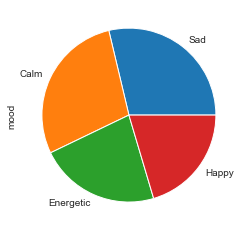

In [90]:
pd.value_counts(dataset['mood']).plot(kind='pie')

In [91]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
# le=LabelEncoder()
# dataset['mood']=le.fit_transform(dataset['mood'])
# dataset['tempo']=le.fit_transform(dataset['tempo'])
# dataset['acousticness']=le.fit_transform(dataset['acousticness'])
# dataset['valence']=le.fit_transform(dataset['valence'])

In [92]:
dataset['mood'].unique()

array(['Happy', 'Sad', 'Energetic', 'Calm'], dtype=object)

In [93]:
dataset.isnull().values.any()

False

In [94]:
dataset['mood']=dataset['mood'].map({'Happy':0, 'Sad':1, 'Energetic': 2, 'Calm':3 }).astype(int)
dataset.head()

,Unnamed: 0,tempo,instrumentalness,acousticness,energy,valence,loudness,mood
0,0,118.523,0.000000,0.13700,0.730,0.625,0.779912,0
1,1,120.255,0.196000,0.01890,0.832,0.166,0.852145,1
2,2,136.168,0.000077,0.91300,0.139,0.116,0.615590,1
3,3,193.100,0.000006,0.08900,0.438,0.587,0.672509,0
4,4,169.881,0.000000,0.00171,0.932,0.445,0.885932,2


In [105]:
data= pd.DataFrame(dataset, columns=['acousticness','valence','energy','tempo','loudness','mood'])
data.head()
# data=dataset

,acousticness,valence,energy,tempo,loudness,mood
0,0.13700,0.625,0.730,118.523,0.779912,0
1,0.01890,0.166,0.832,120.255,0.852145,1
2,0.91300,0.116,0.139,136.168,0.615590,1
3,0.08900,0.587,0.438,193.100,0.672509,0
4,0.00171,0.445,0.932,169.881,0.885932,2


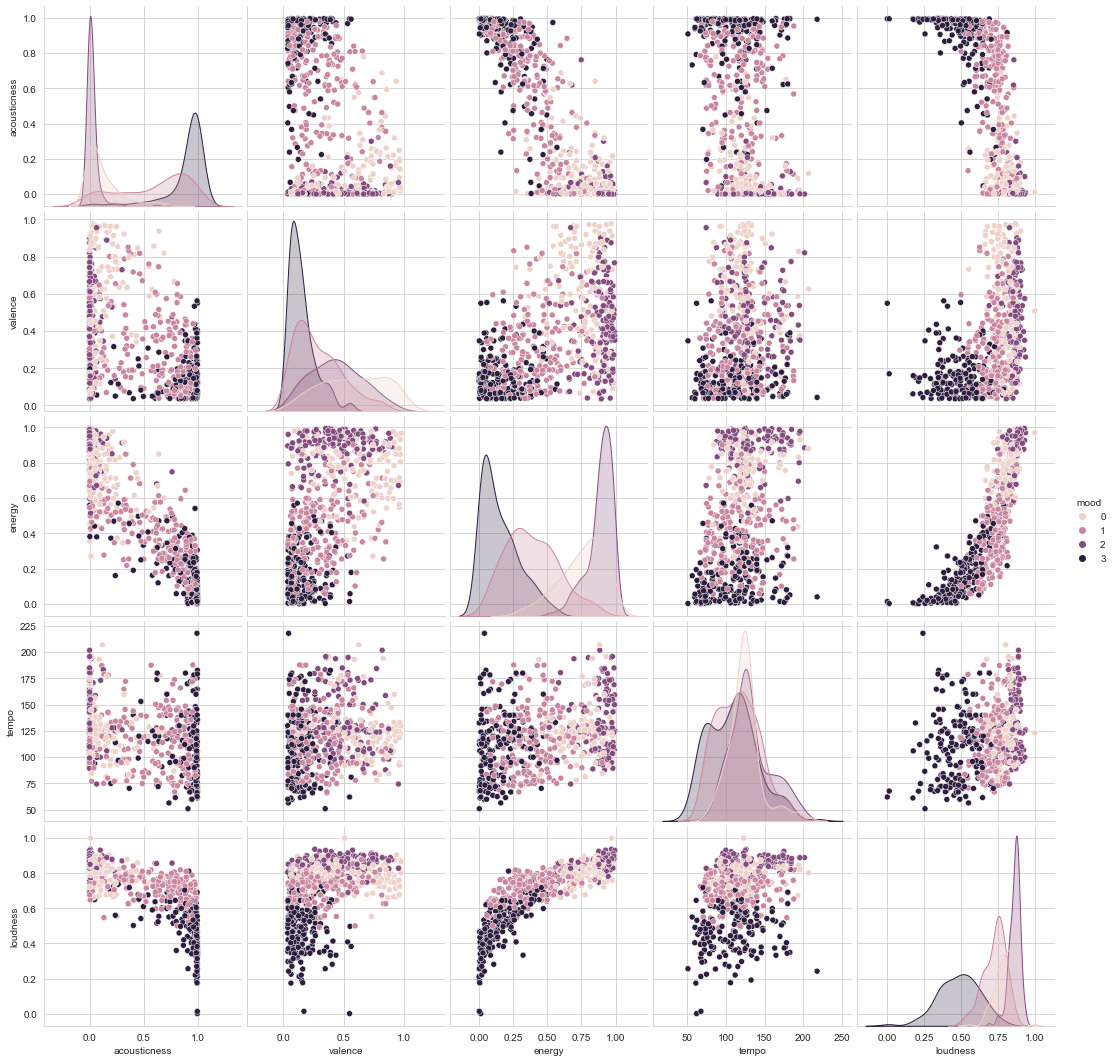

In [106]:
# import numpy as np
# from sklearn.model_selection import train_test_split
# data.columns= data.columns.astype(str)
# x=np.array(dataset.loc[:, :10].std())
# y=np.array(dataset['mood'])

# X_train,x_test, Y_train, y_test= train_test_split(x,y,test_size=0.3, random_state=10)

plt.close()
sns.set_style('whitegrid')
sns.pairplot(data, hue='mood', height=3)
plt.show()

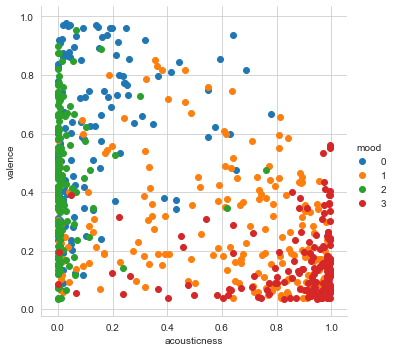

In [107]:
sns.set_style('whitegrid')
sns.FacetGrid(dataset,hue='mood', height=5)\
.map(plt.scatter,'acousticness','valence')\
.add_legend()
plt.show()

In [108]:
data.head()

,acousticness,valence,energy,tempo,loudness,mood
0,0.13700,0.625,0.730,118.523,0.779912,0
1,0.01890,0.166,0.832,120.255,0.852145,1
2,0.91300,0.116,0.139,136.168,0.615590,1
3,0.08900,0.587,0.438,193.100,0.672509,0
4,0.00171,0.445,0.932,169.881,0.885932,2


In [109]:
# features=['acousticness','valence','tempo','energy','mood','instrumentalness','liveness','loudness']
# df=pd.DataFrame(dataset, columns=features)
x_data=data.drop(['mood'], axis=1)
y_data=data['mood']
MinMaxScaler= preprocessing.MinMaxScaler()
X_data_minmax= MinMaxScaler.fit_transform(x_data)

# data= pd.DataFrame(X_data_minmax, columns=['tempo','total_beat','tempo','energy','instrumentalness','liveness','loudness'])
# dataset.head()

In [110]:
X_train, X_test, y_train, y_test = train_test_split(data, y_data,test_size=0.2, random_state = 1)
knn_clf=KNeighborsClassifier()
knn_clf.fit(X_train,y_train)
ypred=knn_clf.predict(X_test) #These are the predicted output values

In [111]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, ypred)
print('Confusion Matrix:')
print(result)
result1 = classification_report(y_test, ypred)
print('Classification Report:',)
print (result1)
result2 = accuracy_score(y_test,ypred)
print('Accuracy:',result2)

Confusion Matrix:
[[14  6  3  0]
 [ 3 36  2  1]
 [ 1  8 26  2]
 [ 0  2  4 30]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.61      0.68        23
           1       0.69      0.86      0.77        42
           2       0.74      0.70      0.72        37
           3       0.91      0.83      0.87        36

    accuracy                           0.77       138
   macro avg       0.78      0.75      0.76       138
weighted avg       0.78      0.77      0.77       138

Accuracy: 0.7681159420289855
